In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('advertising.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
#DataFrame Variáveis independentes
df_nosales = df.drop(['newspaper','sales'], axis=1)
print('DataFrame var indpend: ')
df_nosales

DataFrame var indpend: 


,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [4]:
#Modelo estatístico e métricas de precisão (2 Var independ.)
#Teste de Multicolinearidade e Dimensionalidade 
#Correlação das variáveis independentes
print('Corrleação de Pearson')
df_nosales.corr() #Multicolinearidade -------- Não há multicolinearidade.

Corrleação de Pearson


,TV,radio
TV,1.000000,0.054809
radio,0.054809,1.000000


In [5]:
#Preparando dados para a validação Cruzada
x_train = df_nosales
y_train = df['sales']

num_iterations = 4
quartil_size = len(x_train) // num_iterations # = 50
partitions = [x_train[i:i+quartil_size] for i in range(0, len(x_train), quartil_size)]
#Cria uma lista que contém todos os Quartis, dividos por 4 (25%) ---- X 
target_predictions = [y_train[i:i+quartil_size] for i in range(0, len(y_train), quartil_size)]
#Cria uma lista que contém todos os Quartis, divididos por 4 (25%) ---- Y 

Validação Cruzada - KFold

In [6]:
#Validação Cruzada
mse_scoretrain = []
mse_scoretest = []  #Cria dicionários vazios

for i in range(num_iterations): #Cria um laço que se repete 4 vezes.
    
    x_test, y_test = partitions[i], target_predictions[i] #Chama X(partitions[i]) e Y(target_predictions[1]) de variáveis de teste.
    x_train = np.vstack(partitions[:i] + partitions[i+1:])
    y_train = np.concatenate(target_predictions[:i] + target_predictions[i+1:])
    
    
    modelo = LinearRegression()
    modelo.fit(x_train, y_train)
    y_predtrain = modelo.predict(x_train) #Previsão do treino
    
    y_pred = modelo.predict(x_test) #Previsão do Teste 
    
    #Erros Quadráticos Médios
    msetrain = mean_squared_error(y_train, y_predtrain) #Erro Quadrático médio do Treino
    msetest = mean_squared_error(y_test, y_pred) #Erro Quadrático médio do Teste
    mse_scoretrain.append(msetrain)
    mse_scoretest.append(msetest)
    
    
    
    #Construção do modelo estatísico 
    #Modelo de Regressão pelo Métodos OLS ----- Usado para medir precisão do Modelo de Regressão Linear Múltipla.
    X = x_train
    y = y_train
    X2 = sm.add_constant(X) #Adiciona costante ao modelo
    est = sm.OLS(y, X2) #Criando um mo delo
    est2 = est.fit() #Treinando o modelo estatístico

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearR

Modelo Após 4 iterações

In [7]:
#Modelo ao fim da validação cruzada
print(est2.summary()) #OLS na 4ª iteração.
print("O modelo é: Vendas = {:.5} + {:.5}*TV + {:.5}*radio".format(modelo.intercept_, modelo.coef_[0], modelo.coef_[1]))
#Equação na 4ª Iteração

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     631.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           6.85e-73
Time:                        09:10:30   Log-Likelihood:                -291.77
No. Observations:                 150   AIC:                             589.5
Df Residuals:                     147   BIC:                             598.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0043      0.349      8.614      0.0

Métricas de precisão

In [8]:
print('Erros Quadrados de Treino: ', mse_scoretrain)
print('Erros Quadrados de Teste: ', mse_scoretest)
mse_scoretrain = pd.DataFrame(mse_scoretrain)
mse_scoretest = pd.DataFrame(mse_scoretest)

mean_msetrain = np.mean(mse_scoretrain)
mean_msetest = np.mean(mse_scoretest)
print('Média dos Erros Quadrados de Treino: ', mean_msetrain)
print('Média dos Erros Quadrados de Teste: ', mean_msetest)
variance = mse_scoretrain - mse_scoretest
print('Variância: ', variance.mean())
#Possuem Baixa Variância, além disso, Erros(Bias) baixo nos dois modelo. Logo, o modelo é ótimo.

Erros Quadrados de Treino:  [2.816951500592927, 2.9888807274542164, 2.3891046281470283, 2.8645130201007323]
Erros Quadrados de Teste:  [2.7074370511574, 2.260992655914094, 4.070252853873907, 2.6672010189322117]
Média dos Erros Quadrados de Treino:  2.764862469073726
Média dos Erros Quadrados de Teste:  2.9264708949694027
Variância:  0   -0.161608
dtype: float64


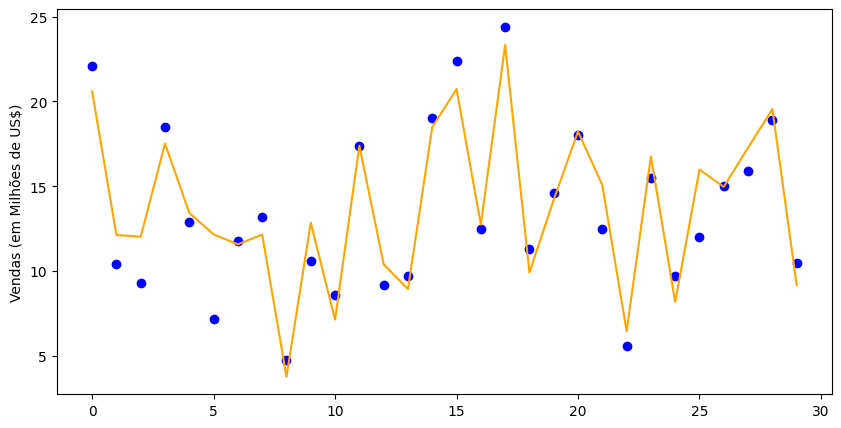

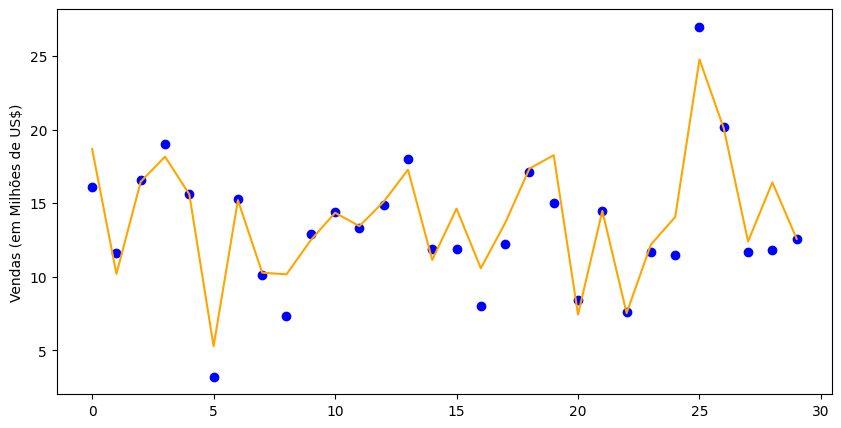

In [10]:
#Gráficos
x = range(0, 30) #Argumento de períodos

#Conjuntos
y_train = pd.DataFrame(y_train)
y_train30 = y_train.head(30)

y_test = pd.DataFrame(y_test)
y_test30 = y_test.head(30)




#Predições
y_predtrain = pd.DataFrame(y_predtrain)
y_predtrain30 = y_predtrain.head(30)


y_pred = pd.DataFrame(y_pred)
y_pred30 = y_pred.head(30)

#Gráfico Treino
plt.figure(figsize = (10,5))
plt.plot(y_predtrain30, c='orange')
plt.scatter(x, y_train30, color='blue', marker='o')
plt.ylabel('Vendas (em Milhões de US$)')
plt.show()

#Gráfico Teste
plt.figure(figsize = (10,5))
plt.plot(y_pred30, c='orange')
plt.scatter(x, y_test30, color='blue', marker='o')
plt.ylabel('Vendas (em Milhões de US$)')
plt.show()